# DiffDRR Datasets

> Open-source 2D/3D registration datasets and dataloaders for [`DiffDRR`](https://github.com/eigenvivek/DiffDRR/)

[![CI](https://github.com/eigenvivek/DiffDRR-Datasets/actions/workflows/test.yaml/badge.svg)](https://github.com/eigenvivek/DiffDRR-Datasets/actions/workflows/test.yaml)
[![Paper shield](https://img.shields.io/badge/arXiv-2208.12737-red.svg)](https://arxiv.org/abs/2208.12737)
[![License: MIT](https://img.shields.io/badge/License-MIT-blue.svg)](LICENSE)
[![Docs](https://github.com/eigenvivek/DiffDRR-Datasets/actions/workflows/deploy.yaml/badge.svg)](https://vivekg.dev/DiffDRR-Datasets/)
[![Code style: black](https://img.shields.io/badge/Code%20style-black-black.svg)](https://github.com/psf/black)

## Install

```zsh
pip install diffdrrdata
```

## DiffDRR

`DiffDRR` is an differentiable X-ray renderer used for solving inverse problems in tomographic imaging.
If you find [`DiffDRR`](https://github.com/eigenvivek/DiffDRR/) useful in your work, please cite our paper:

```
@inproceedings{gopalakrishnan2022fast,
  title={Fast auto-differentiable digitally reconstructed radiographs for solving inverse problems in intraoperative imaging},
  author={Gopalakrishnan, Vivek and Golland, Polina},
  booktitle={Workshop on Clinical Image-Based Procedures},
  pages={1--11},
  year={2022},
  organization={Springer}
}
```

## Datasets

We provide APIs to load the following open-source datasets into `DiffDRR`:

| **Dataset**                                                                | **Anatomy**        | **\# of Subjects** | **\# of 2D Images** | **CTs** | **X-rays** | Fiducials |
|----------------------------------------------------------------------------|--------------------|:------------------:|:-------------------:|:-------:|:----------:|:---------:|
| [`DeepFluoro`](https://github.com/rg2/DeepFluoroLabeling-IPCAI2020)        | pelvis             |         6          |         366         |   ✅    |     ✅     |    ❌     |
| [`Ljubljana`](https://lit.fe.uni-lj.si/en/research/resources/3D-2D-GS-CA/) | neurovasculature   |         10         |         20          |   ✅    |     ✅     |    ✅     |

If you use any of these datasets, please cite the original papers.

### `DeepFluoro`

`DeepFluoro` ([**Grupp et al., 2020**](https://link.springer.com/article/10.1007/s11548-020-02162-7)) provides paired X-ray fluoroscopy images and CT volume of the pelvis. The data were collected from six cadaveric subjects at John Hopkins University. Ground truth camera poses were estimated with an offline registration process. A visualization of the X-ray / CT pairs in the `DeepFluoro` dataset is available [here](https://vivekg.dev/DiffDRR-Datasets/deepfluoro_camera_poses.html).

```
@article{grupp2020automatic,
  title={Automatic annotation of hip anatomy in fluoroscopy for robust and efficient 2D/3D registration},
  author={Grupp, Robert B and Unberath, Mathias and Gao, Cong and Hegeman, Rachel A and Murphy, Ryan J and Alexander, Clayton P and Otake, Yoshito and McArthur, Benjamin A and Armand, Mehran and Taylor, Russell H},
  journal={International journal of computer assisted radiology and surgery},
  volume={15},
  pages={759--769},
  year={2020},
  publisher={Springer}
}
```

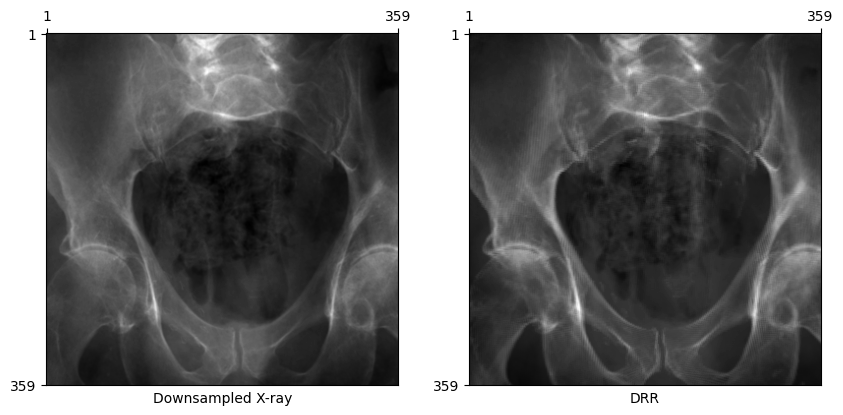

In [ ]:
#| eval: false
import matplotlib.pyplot as plt
import torch
from diffdrr.drr import DRR
from diffdrr.visualization import plot_drr

from diffdrrdata.deepfluoro import DeepFluoroDataset, Transforms

# Load a subject from the DeepFluoroDataset
deepfluoro = DeepFluoroDataset(id_number=1, bone_attenuation_multiplier=2.5)

# Initialize the DRR module
subsample = 4
drr = DRR(
    deepfluoro.subject,
    deepfluoro.focal_len,
    deepfluoro.height // subsample,
    deepfluoro.delx * subsample,
    x0=deepfluoro.x0,
    y0=deepfluoro.y0,
)
transform = Transforms(deepfluoro.height // subsample)

# Render a DRR from the ground truth camera pose
gt, pose = deepfluoro[0]
img = drr(pose)
gt, img = transform(gt), transform(img)
plot_drr(torch.concat([gt, img]), title=["Downsampled X-ray", "DRR"])
plt.show()

### `Ljubljana`

`Ljubljana` (**[Mitrovic et al., 2013](https://ieeexplore.ieee.org/abstract/document/6507588)**) provides paired 2D/3D digital subtraction angiography (DSA) images. The data were collected from 10 patients undergoing endovascular image-guided interventions at the University of Ljubljana. Ground truth camera poses were estimated by registering surface fiducial markers.

```
@article{pernus20133d,
  title={3D-2D registration of cerebral angiograms: A method and evaluation on clinical images},
  author={Mitrović, Uros˘ and S˘piclin, Z˘iga and Likar, Bos˘tjan and Pernus˘, Franjo},
  journal={IEEE transactions on medical imaging},
  volume={32},
  number={8},
  pages={1550--1563},
  year={2013},
  publisher={IEEE}
}
```

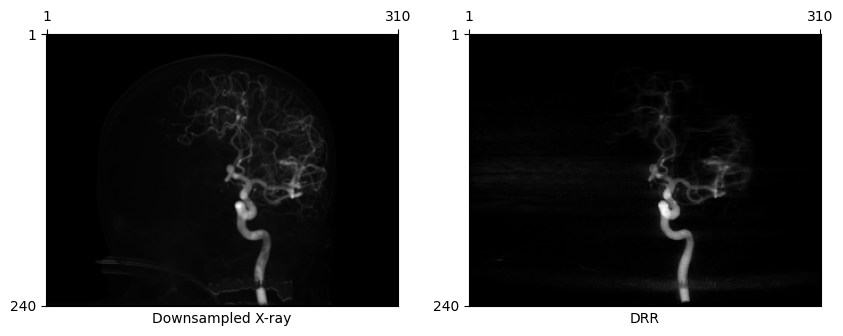

In [ ]:
#| eval: false
from diffdrrdata.ljubljana import LjubljanaDataset, Transforms

# Load a subject from the LjubljanaDataset
ljubljana = LjubljanaDataset(id_number=1)
gt, pose, focal_len, height, width, delx, dely, x0, y0 = ljubljana[0]

# Initialize the DRR module
subsample = 8
drr = DRR(
    ljubljana.subject,
    focal_len,
    height // subsample,
    delx * subsample,
    width // subsample,
    dely * subsample,
    x0=x0,
    y0=y0,
)
transform = Transforms(height // subsample, width // subsample)

# Render a DRR from the ground truth camera pose
img = drr(pose)
gt, img = transform(gt), transform(img)
plot_drr(torch.concat([gt, img]), title=["Downsampled X-ray", "DRR"])
plt.show()